This notebook is more suitable for mathematical experiments and explanations.

In [794]:
import numpy as np
import matplotlib.pyplot as plt

In [795]:
# Initializations

num_possible_actions = 1
iterations = 250

Q = np.zeros(num_possible_actions)
q_star = np.zeros(num_possible_actions)

reward = []
average_reward = 0

We have 1 possible action (So far). Each action posesses a true value $q^*(a)$:
\begin{equation}
q^*(a) \sim N(0,1)
\end{equation}

Of course, $q^*(a)$ should be fixed from the beginning and won't change from iteration to iteration.

In [796]:
"""
q*(a) ~ N(0, 1) is fixed for each action.
"""
for i in range(len(q_star)):
    q_star[i] = np.random.normal(0, 1)

q_star

array([-0.6201068])

Cell below does the following:
1. It introduces and generates values for the Random Variable reward as:
\begin{equation}
R_{i}(a) \sim N(q_{*}(a), 1)
\end{equation}
where $i$ is the current iteration.

2. It computes the mean reward (of a single action $a$) obtained from #iterations. This value is called $Q_{n}(a)$ and denotes the **estimate** of the action we are concentrated in.
\begin{equation}
Q_n(a) \doteq \frac{R_1(a)+R_2(a)+\cdots+R_{n-1}(a)}{n-1}
\end{equation}
of course, 

\begin{equation}
Q_n(a) \xrightarrow{n \to \infty} q_*(a)
\end{equation}

In [797]:
#Step 1
print(f"Rewards being generated centered at {q_star[0]:.4f}\n")

for steps in range(iterations):
    for i in range(len(Q)):
        reward.append(np.random.normal(q_star[i], 1))

#Step 2
for j in range(len(reward)):
    print(f"Reward at t = {j} was {reward[j]:.4f} for action {i}")

print(f"Mean reward = {np.mean(reward):.4f}")

Rewards being generated centered at -0.6201

Reward at t = 0 was -1.3329 for action 0
Reward at t = 1 was -0.7524 for action 0
Reward at t = 2 was 0.2378 for action 0
Reward at t = 3 was -0.5668 for action 0
Reward at t = 4 was 0.1805 for action 0
Reward at t = 5 was 1.0588 for action 0
Reward at t = 6 was -0.3667 for action 0
Reward at t = 7 was -1.8164 for action 0
Reward at t = 8 was 1.6709 for action 0
Reward at t = 9 was -0.2757 for action 0
Reward at t = 10 was -1.1729 for action 0
Reward at t = 11 was -0.8214 for action 0
Reward at t = 12 was -0.2289 for action 0
Reward at t = 13 was -1.1512 for action 0
Reward at t = 14 was 0.2505 for action 0
Reward at t = 15 was -0.6658 for action 0
Reward at t = 16 was -1.4225 for action 0
Reward at t = 17 was 0.2945 for action 0
Reward at t = 18 was 0.2681 for action 0
Reward at t = 19 was -2.6183 for action 0
Reward at t = 20 was -1.1328 for action 0
Reward at t = 21 was -0.0487 for action 0
Reward at t = 22 was -0.3839 for action 0
Reward

When to step generating new values? Remember that the *mean and variance* of the population are unknown. We will continue to generate new data and stop as follows:

1. Choose an acceptable value $d$ for the standard deviation of the estimator.
2. Generate at least 100 data values. **Burn-In phase**
3. Continue to generate additional data values, stopping when you have generated $k$ values and $S / \sqrt{k}<d$, where $S$ is the sample standard deviation based on those $k$ values.
4. The estimate of $\theta$ is given by $\bar{X}=\sum_{i=1}^k X_i / k$.

In [798]:
# No Burn-In phase.
""" 
In practice, not using the Burn-In phase may cause situations such as:

1 data points were generated to achieve S/sqrt(k) < d
(True mean, estimated mean) = (0.40078133412317934, 0.5255517960646893) 

Pay attention to the estimate of the mean. It is not very good.
What happened was that the initial variability of the data 
(transient state is a good term to think about here)
caused the condition to be satisfied. 

Burn-In throws away some iterations in an attempt to dismiss
the transient phase of the process.

It seems to be more of an empirical approach and basically
tries to avoid starting at bad initial conditions (or subsets of data).

"""
reward = []
d = 0.1
sample_variance = d + 1
k = 1

for i in range(len(Q)):
    #Como dividimos por n - 1, precisamos de pelo menos duas amostras.
    reward.append(np.random.normal(q_star[i], 1))
    reward.append(np.random.normal(q_star[i], 1))

    while sample_variance/np.sqrt(k) >= d:
        reward.append(np.random.normal(q_star[i], 1))
        sample_variance = np.var(reward, ddof=1)
        k = k + 1

print(f"{k - 1} data points were generated to achieve S/sqrt(k) < d")
print(f"(True mean, estimated mean) = ({q_star[0]}, {np.mean(reward)})")
len(reward)


88 data points were generated to achieve S/sqrt(k) < d
(True mean, estimated mean) = (-0.6201067982890204, -0.588525383491204)


90

In [799]:
# WITH Burn-In phase.
"""
There are still bad estimates such as:

99 + 100 = 199 data points were generated to achieve S/sqrt(k) < d
(True mean, estimated mean) = (-0.006676708893368068, 0.01166517574425389)

but they are more rare and tend to be less frequent.
"""
reward = []
d = 0.1
sample_variance = d + 1
k = 1

#Burn-In
for burn_in_phase in range(100):
    reward.append(np.random.normal(q_star[i], 1))

for i in range(len(Q)):

    while sample_variance/np.sqrt(k) >= d:
        reward.append(np.random.normal(q_star[i], 1))
        sample_variance = np.var(reward, ddof=1)
        k = k + 1

print(f"{(k - 1)} + {burn_in_phase + 1} = {(k - 1) + (burn_in_phase + 1)} data points were generated to achieve S/sqrt(k) < d")
print(f"(True mean, estimated mean) = ({q_star[0]}, {np.mean(reward)})")
len(reward)

117 + 100 = 217 data points were generated to achieve S/sqrt(k) < d
(True mean, estimated mean) = (-0.6201067982890204, -0.574102113895741)


217

In [800]:
for i in range(len(Q)):
    while sample_variance/np.sqrt(k) >= d:
        reward.append(np.random.normal(q_star[i], 1))
        sample_variance = np.var(reward, ddof=1)
        k = k + 1

print(f"{k - 1} data points were generated to achieve S/sqrt(k) < d")
print(f"(True mean, estimated mean) = ({q_star[0]}, {np.mean(reward)})")
len(reward)

117 data points were generated to achieve S/sqrt(k) < d
(True mean, estimated mean) = (-0.6201067982890204, -0.574102113895741)


217

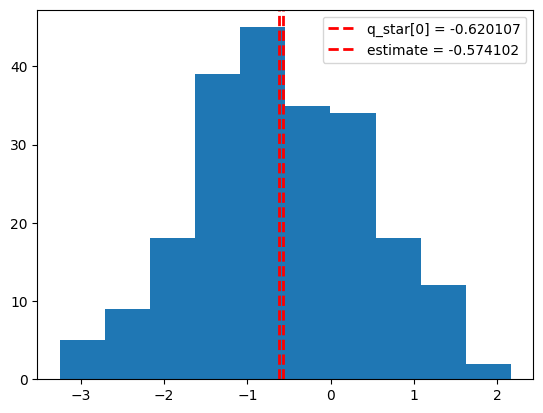

In [801]:
plt.hist(reward)
plt.axvline(q_star[0], color='r', linestyle='--', linewidth=2, label=f'q_star[0] = {q_star[0]:.6f}')
plt.axvline(np.mean(reward), color='r', linestyle='--', linewidth=2, label=f'estimate = {np.mean(reward):.6f}')
plt.legend()

plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x20a045e2210>,
 'caps': [<matplotlib.lines.Line2D at 0x20a045e27e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20a045e1fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x20a045e2d80>],
 'fliers': [<matplotlib.lines.Line2D at 0x20a045e3080>],
 'means': []}

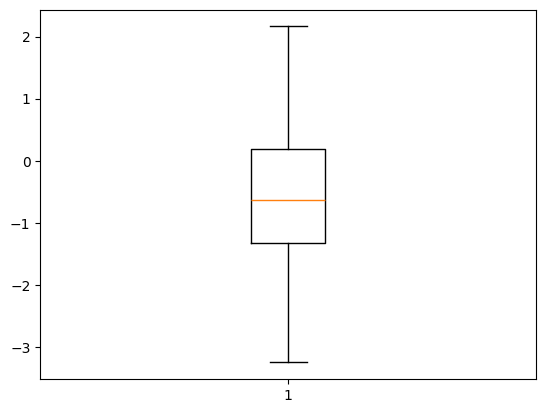

In [802]:
plt.boxplot(reward)